AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
import pandas as pd   
df=pd.read_csv('titanic.csv')
print(df.head(10))
print(df.tail(20))
print(df.info())
print(df.describe())

   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0  

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


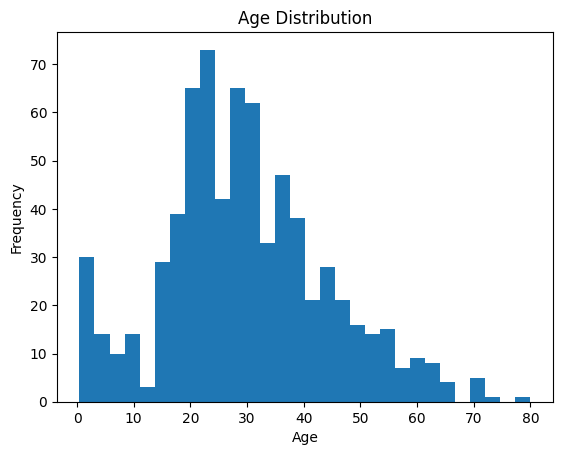

In [3]:
import matplotlib.pyplot as plt
#Find out how many missing values there are in the dataset
missing_values = df.isnull().sum()  
print(missing_values)

# 2.  Handling missing values in column 'Age'
#2.1 Draw a histogram
plt.hist(df['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#2.2 Trends in Computing Centers
age_median = df['Age'].median()

#2.3 Fill in missing values
df['Age'].fillna(age_median, inplace=True)

# 3.  Handling missing values in the 'Cabin' column
df['Cabin'].fillna('Unknown', inplace=True)

# 4.  Handling missing values in column 'Embarked'
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

# 5.  Handling erroneous data in the 'Survival' column
df = df[df['Survived'].isin([0, 1])]

# 6.  Dealing with formatting errors in the 'Fare' column
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Fare'].fillna(df['Fare'].median(), inplace=True)

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average Fare by Pclass:
Pclass
1    83.687751
2    20.528782
3    13.690291
Name: Fare, dtype: float64


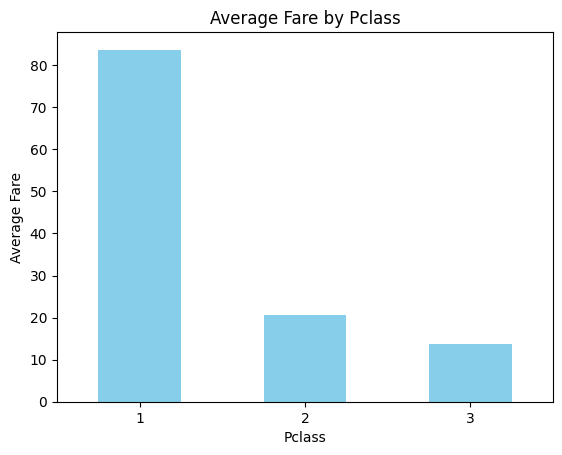

Average Fare by Sex:
Sex
female    44.265872
male      25.435527
Name: Fare, dtype: float64


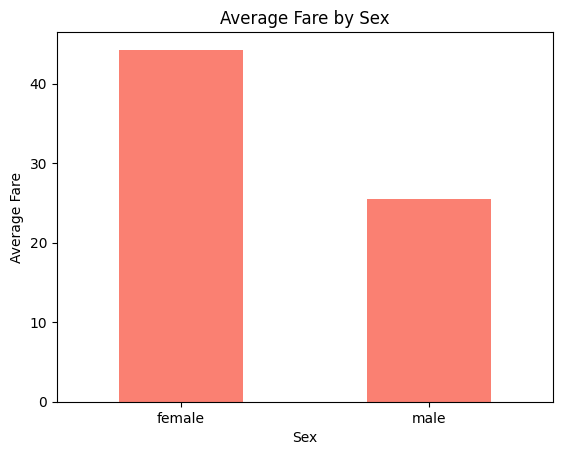

In [18]:
import matplotlib.pyplot as plt

# 1.  Calculate the average ticket price grouped by Pclass
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Average Fare by Pclass:")
print(average_fare_by_pclass)

#1.1 Draw a bar chart
average_fare_by_pclass.plot(kind='bar', color='skyblue')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0) 
plt.show()

# 2.  Calculate the average ticket price grouped by sex
average_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print("Average Fare by Sex:")
print(average_fare_by_sex)

#2.1 Draw a bar chart
average_fare_by_sex.plot(kind='bar', color='salmon')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)  
plt.show()





AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

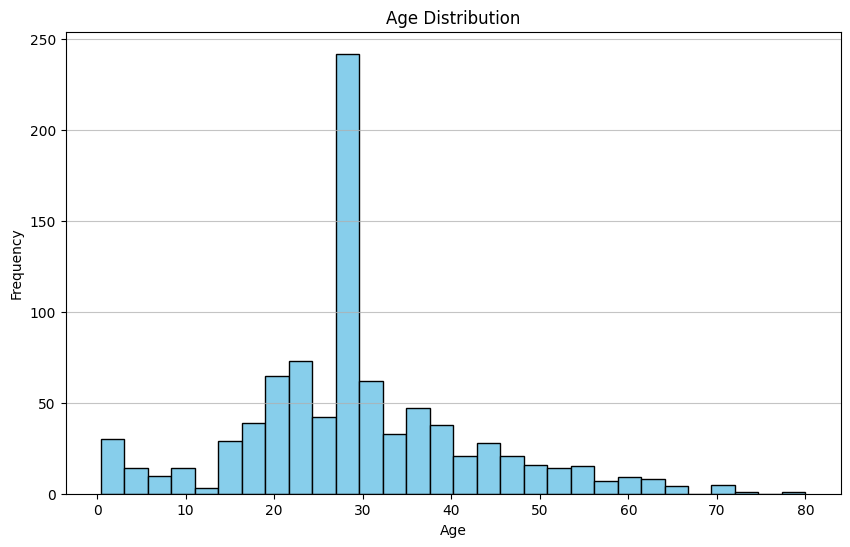

In [19]:
#1. Plot the distribution of 'Age' using a suitable plot
#Ensure that the format of the 'Age' column is correct
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].fillna(df['Age'].median(), inplace=True)


plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

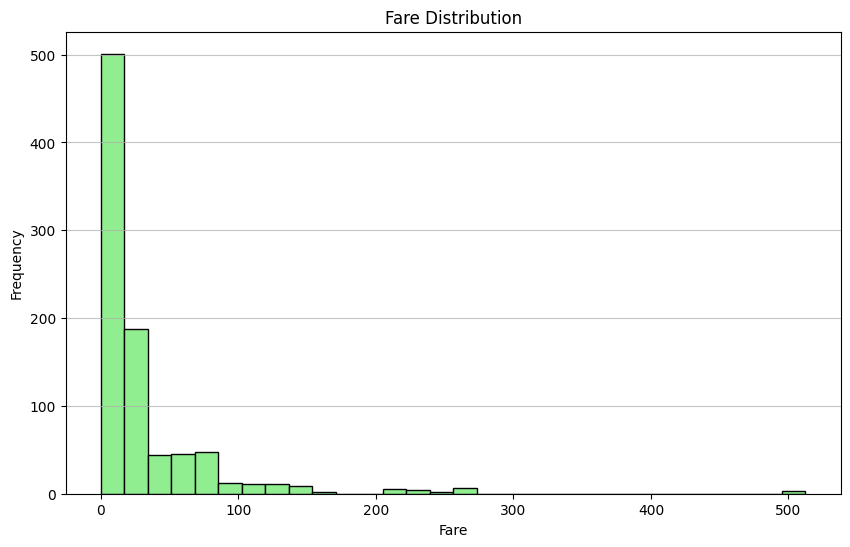

In [20]:
#2. Plot the distribution of 'Fare' using a suitable plot
#Ensure that the format of the 'Fare' column is correct
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Fare'].fillna(df['Fare'].median(), inplace=True)


plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

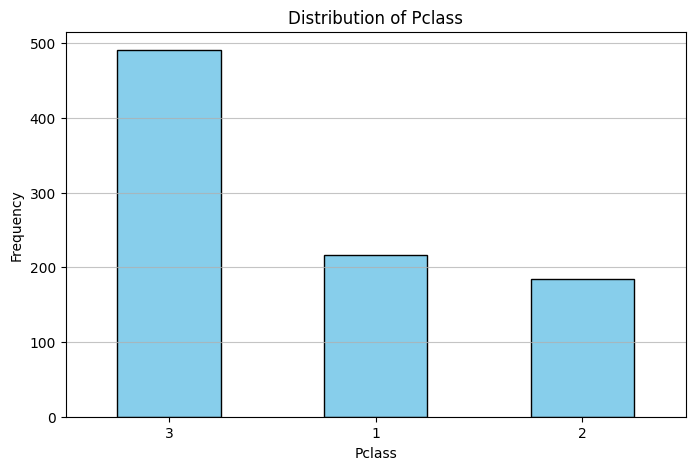

In [21]:
#3.Plot the distribution of 'Pclass' using a suitable plot
#Calculate the count of each Pclass
pclass_counts = df['Pclass'].value_counts()


plt.figure(figsize=(8, 5))
pclass_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.grid(axis='y', alpha=0.75)
plt.show()

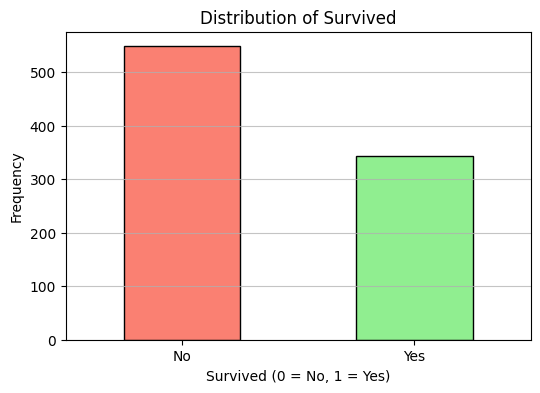

In [26]:
#4. Plot the distribution of 'Survived' using a suitable plot
#Convert 'zero' and 'one' in the 'Survey' column to 0 and 1, while handling case
df['Survived'] = df['Survived'].str.lower().replace({'zero': 0, 'one': 1})

#Ensure that the 'Survival' column is of integer type
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce').fillna(0).astype(int)

#Calculate the count of each Survived value
survived_counts = df['Survived'].value_counts()


plt.figure(figsize=(6, 4))
survived_counts.plot(kind='bar', color=['salmon', 'lightgreen'], edgecolor='black')
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)  
plt.grid(axis='y', alpha=0.75)
plt.show()

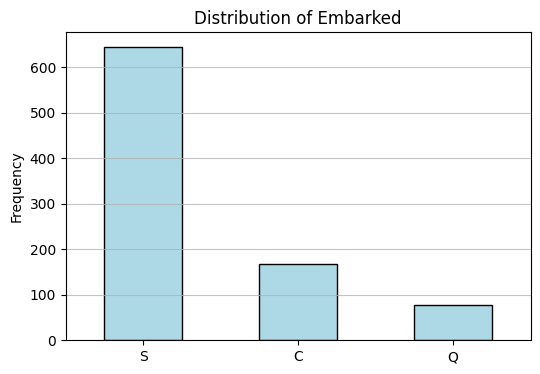

In [28]:
#5Plot the distribution of 'Embarked' using a suitable plot
#Calculate the count of each Embarked value
embarked_counts = df['Embarked'].value_counts()


plt.figure(figsize=(6, 4))
embarked_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of Embarked')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.grid(axis='y', alpha=0.75)
plt.show()

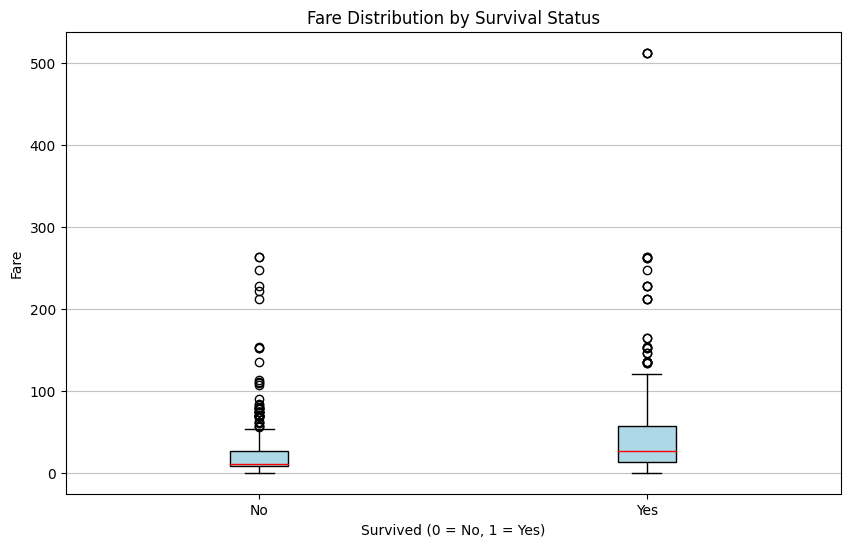

In [33]:
#6. Plot the distribution of 'Fare' grouped by 'Survived'
#Group by survival status and obtain ticket price data
fare_survived_0 = df[df['Survived'] == 0]['Fare']
fare_survived_1 = df[df['Survived'] == 1]['Fare']


plt.figure(figsize=(10, 6))
plt.boxplot([fare_survived_0, fare_survived_1], labels=['No', 'Yes'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.grid(axis='y', alpha=0.75)
plt.show()

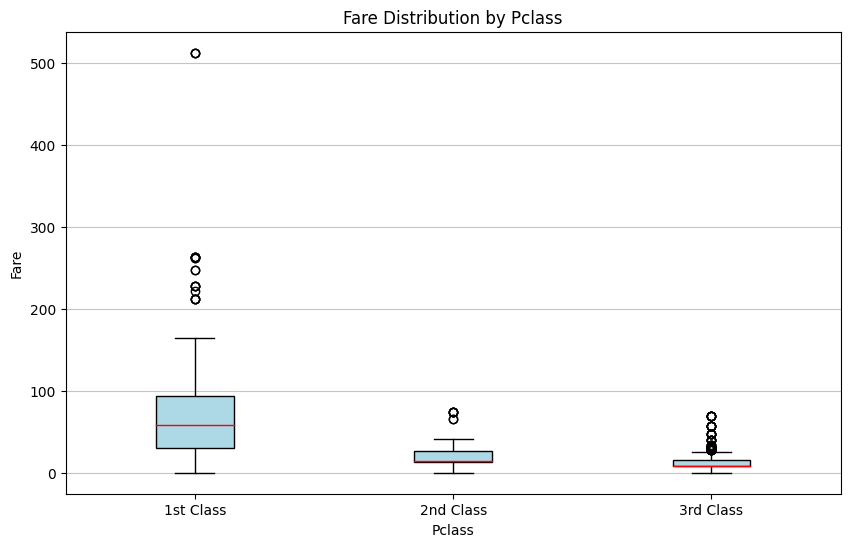

In [34]:
#7. Plot the distribution of 'Fare' grouped by 'Pclass'
#Group by cabin and obtain ticket price data
fare_pclass_1 = df[df['Pclass'] == 1]['Fare']
fare_pclass_2 = df[df['Pclass'] == 2]['Fare']
fare_pclass_3 = df[df['Pclass'] == 3]['Fare']


plt.figure(figsize=(10, 6))
plt.boxplot([fare_pclass_1, fare_pclass_2, fare_pclass_3], labels=['1st Class', '2nd Class', '3rd Class'],
            patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.grid(axis='y', alpha=0.75)
plt.show()

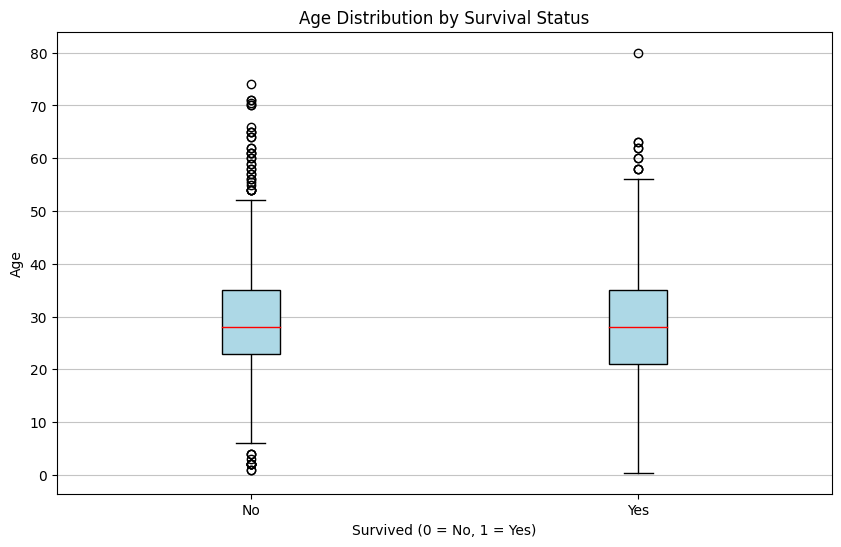

In [35]:
#8. Plot the distribution of 'Age' grouped by 'Survived'
#Grouping by survival status and obtaining age data
age_survived_0 = df[df['Survived'] == 0]['Age']
age_survived_1 = df[df['Survived'] == 1]['Age']


plt.figure(figsize=(10, 6))
plt.boxplot([age_survived_0, age_survived_1], labels=['No', 'Yes'],
            patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

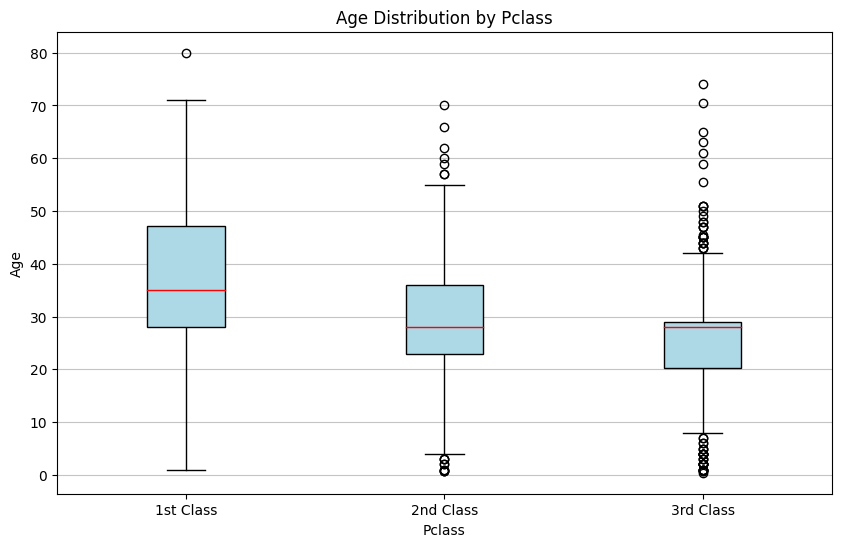

In [36]:
#9. Plot the distribution of 'Age' grouped by 'PClass'
#Group by cabin class and obtain age data
age_pclass_1 = df[df['Pclass'] == 1]['Age']
age_pclass_2 = df[df['Pclass'] == 2]['Age']
age_pclass_3 = df[df['Pclass'] == 3]['Age']


plt.figure(figsize=(10, 6))
plt.boxplot([age_pclass_1, age_pclass_2, age_pclass_3], labels=['1st Class', '2nd Class', '3rd Class'],
            patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

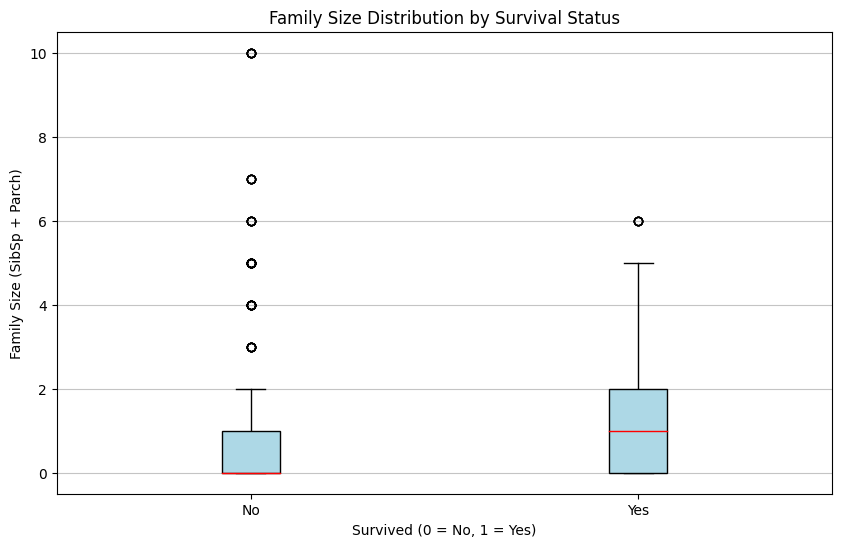

In [37]:
#10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
#Create a new column 'FamilySize' to represent the sum of SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch']

#Group by survival status and obtain FamilySize data
family_size_survived_0 = df[df['Survived'] == 0]['FamilySize']
family_size_survived_1 = df[df['Survived'] == 1]['FamilySize']


plt.figure(figsize=(10, 6))
plt.boxplot([family_size_survived_0, family_size_survived_1], labels=['No', 'Yes'],
            patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Family Size Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Family Size (SibSp + Parch)')
plt.grid(axis='y', alpha=0.75)
plt.show()

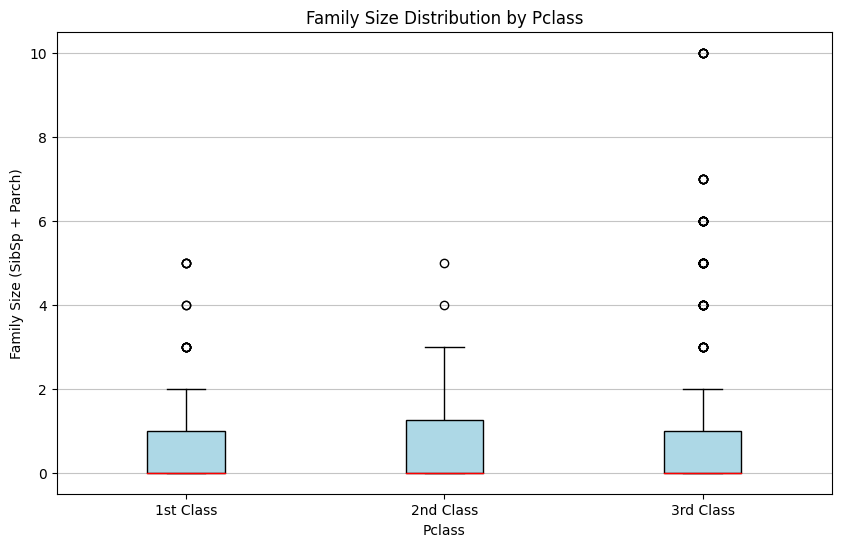

In [38]:
#11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
#Group by cabin class and obtain FamilySize data
family_size_pclass_1 = df[df['Pclass'] == 1]['FamilySize']
family_size_pclass_2 = df[df['Pclass'] == 2]['FamilySize']
family_size_pclass_3 = df[df['Pclass'] == 3]['FamilySize']


plt.figure(figsize=(10, 6))
plt.boxplot([family_size_pclass_1, family_size_pclass_2, family_size_pclass_3],
            labels=['1st Class', '2nd Class', '3rd Class'],
            patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Family Size Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Family Size (SibSp + Parch)')
plt.grid(axis='y', alpha=0.75)
plt.show()

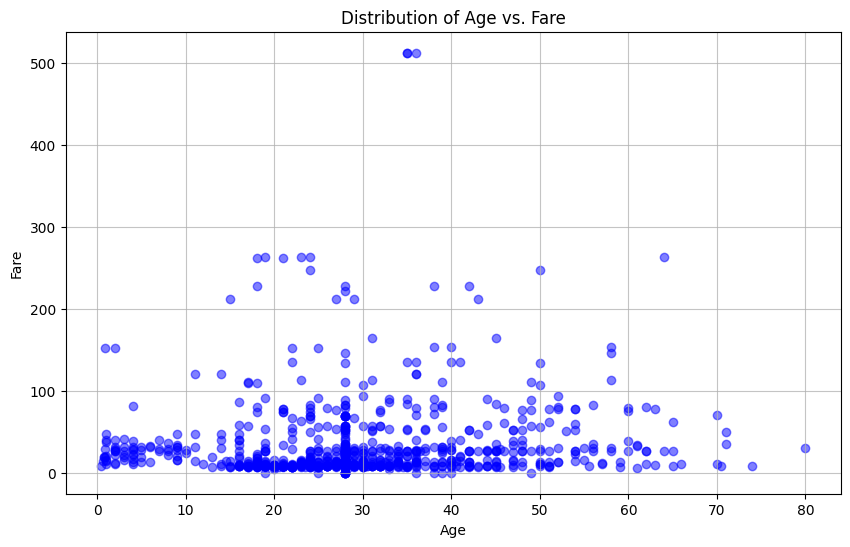

In [39]:
#12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5, color='blue')
plt.title('Distribution of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(alpha=0.75)
plt.show()

<AxesSubplot:xlabel='Pclass'>

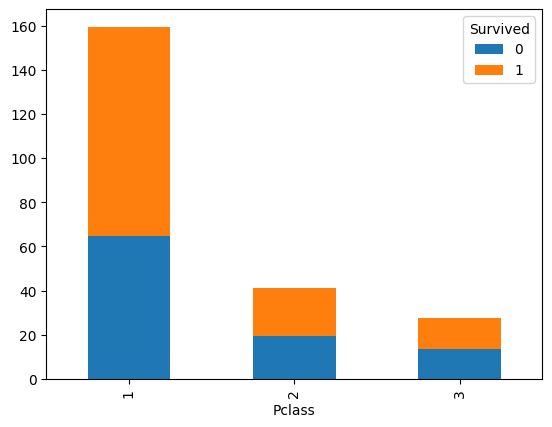

In [43]:
fare_distribution = df.groupby(['Pclass', 'Survived'])['Fare'].mean().unstack()
fare_distribution.plot(kind='bar', stacked=True)


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

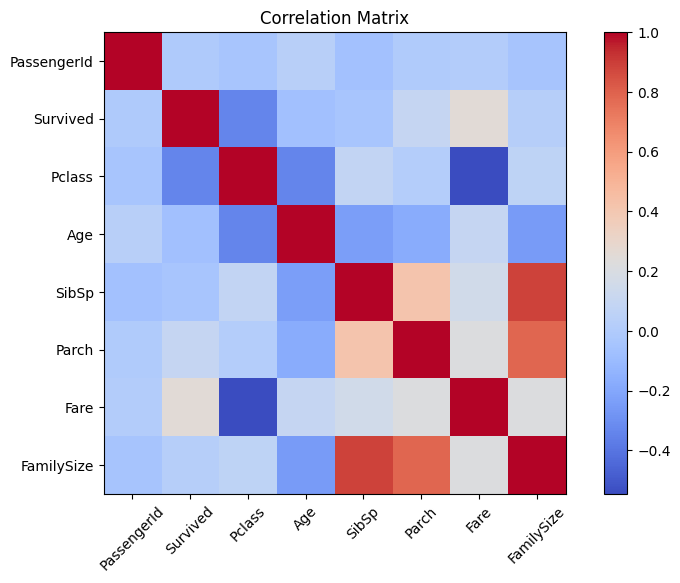

In [46]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [10]:
import pandas as pd
df = pd.read_csv('titanic.csv')

#Process the string format in the 'Fare' column
df['Fare'] = df['Fare'].replace({'\$': '', '': None}, regex=True).astype(float)


df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

#Find the correlation between age and ticket price
age_fare_correlation = df['Age'].corr(df['Fare'])
print(f'Correlation between Age and Fare: {age_fare_correlation:.2f}')



Correlation between Age and Fare: 0.10


In [12]:
import pandas as pd


df = pd.read_csv('titanic.csv')


df['Survived'] = df['Survived'].replace({'zero': 0, 'one': 1, 'Zero': 0, 'One': 1})
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
df['Survived'] = df['Survived'].fillna(0).astype(int)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'] = df['Fare'].replace({'\$': '', '': None}, regex=True).astype(float)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

#Find the correlation between age and survival rate
age_survived_correlation = df['Age'].corr(df['Survived'])
print(f'Correlation between Age and Survived: {age_survived_correlation:.2f}')


Correlation between Age and Survived: -0.06
